In [2]:
%pylab inline
import os
import sys
import numpy as np
import matplotlib
import serial
import pyvisa
import struct as struct
from time import sleep, time
from pylab import *
from datetime import datetime

from scipy.special import jv
import csv
import numpy as np
import pylab as plt
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [18]:
from scipy.optimize import curve_fit

def appg1(t, gamma_i, gamma_s):
    return heaviside(t, 0)*exp(-2*gamma_s*t)+heaviside(-t, 1)*exp(2*gamma_i*t)

def optg1(xdata, ydata, p0):
    popt, pcov = curve_fit(appg1, xdata, ydata, p0)
    return [popt,pcov]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]


Text(0.2, 0.8, '\\textbf{b)}')

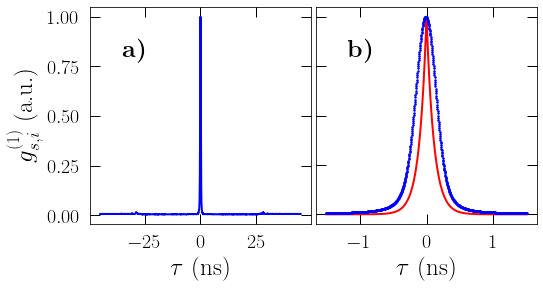

In [150]:
#Cross Correlation

##############################Initialise#####################################################
nrow = 1
ncol = 2
xsize = 8
ysize = 4


#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 10


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=25

#format axis labels
#x_locator = FixedLocator([0,45,90])
#x_formatter = FixedFormatter([0,r'$\pi/4$',r'$\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')

for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#    axes[i].xaxis.set_major_formatter(x_formatter)
#    axes[i].xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
#    axes[i].set_xlim(-15,105)
#    axes[i].set_ylim(-0.1,2.6)
    

    
axes[1].set_yticklabels([])
    
#cross correlation

#############################################################################################
#labels
axes[0].set_ylabel(r'$g^{(1)}_{s,i}$ (a.u.)', fontsize = labelfont)
axes[0].set_xlabel(r'$\tau$ (ns)', fontsize = labelfont)
axes[1].set_xlabel(r'$\tau$ (ns)', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

y_array = load('20200811_1046_cross_correlation_nbins-30000_binwidth-3_signal2.npy')
x_array = linspace(-30000*3/2, 30000*3/2 - 3, 30000)/1000

gopt, gcov = optg1(x_array[14500:-14500], y_array[14505:-14495]/max(y_array[14500:-14500]), p0=[0,0])

axes[0].plot(x_array,y_array/max(y_array), label='Cross Correlation',lw=2,color='blue')
axes[1].plot(x_array[14500:-14500], appg1(x_array[14500:-14500], gopt[0], gopt[1]), lw = 2, color = 'red', label = 'Gaussian Fit')
axes[1].plot(x_array[14500:-14500],y_array[14510:-14490]/max(y_array[14510:-14490]),'.', label='Cross Correlation',markersize=3,zorder=3,color='blue')

lft = 0.2
btm = 0.8

axes[0].text(lft, btm,r'\textbf{a)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes, fontsize = labelfont)
axes[1].text(lft, btm,r'\textbf{b)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1].transAxes, fontsize = labelfont)


In [149]:
gopt

array([2.33467539, 2.26722484])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in sqrt


Text(0.15, 0.2, '\\textbf{b)}')

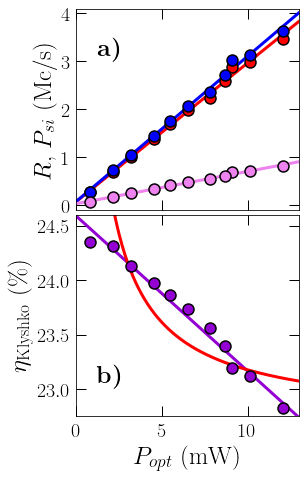

In [132]:
#Power Regulation

##############################Initialise#####################################################
nrow = 2
ncol = 1
xsize = 4
ysize = 7.5


#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 6


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=25

#format axis labels
#x_locator = FixedLocator([0,45,90])
#x_formatter = FixedFormatter([0,r'$\pi/4$',r'$\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')

for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#    axes[i].xaxis.set_major_formatter(x_formatter)
#    axes[i].xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
    axes[i].set_xlim(0,13)
axes[0].set_ylim(-0.1,4.1)
#axes[1].set_ylim(-0.05,0.9)
axes[1].set_ylim(22.75,24.6)
    
axes[0].set_xticklabels([])
#axes[1].set_xticklabels([])

#cross correlation

#############################################################################################
#labels
axes[0].set_ylabel(r'$R$, $P_{si}$ (Mc/s)', fontsize = labelfont)
axes[1].set_ylabel(r'$\eta_{\text{Klyshko}}$ (\%)', fontsize = labelfont)
#axes[2].set_ylabel(r'$\eta_{\text{Klyshko}}$ (\%)', fontsize = labelfont)
axes[1].set_xlabel(r'$P_{opt}$ (mW)', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

def linf(x, a, b):
    return a *array(x) + b

def cf(xf, yf, a=0, b=0):
    p = p0=[a, b]

    popt, pcov = curve_fit(linf, xf, yf, p0 = p)
    
    return popt

y_array = array(load('20200811_1232_powerdep.npy'))
x_array = [12.05,10.12,9.10,8.67,7.8,6.52,5.49,4.55,3.2,2.15,0.848]
x_array_alt=[85.1,80.1,75.1,70.1,65.1,60.0,55,50,45,40,35]
x = linspace(-10, 30, 1000)

#Fits
axes[0].plot(x,linf(x, *cf(x_array, y_array[:,0]/1e6)), color='red', lw =3)
axes[0].plot(x,linf(x, *cf(x_array, y_array[:,1]/1e6)), color='blue', lw =3)
axes[0].plot(x,linf(x, *cf(x_array, y_array[:,2]/1e6)), color='violet', lw =3)
axes[1].plot(x,linf(x, *cf(x_array, y_array[:,3])), color='darkviolet', lw =3)
#axes[1].plot(x,100*linf(x, *cf(x_array, y_array[:,2]/1e6))/sqrt(linf(x, *cf(x_array, y_array[:,0]/1e6))*linf(x, *cf(x_array, y_array[:,1]/1e6))), color='red', lw =3)

#Scatter
axes[0].plot(x_array,y_array[:,0]/1e6, '.', label='Signal',color  = 'red',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(x_array,y_array[:,1]/1e6, '.', label='Idler',color  = 'blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(x_array,y_array[:,2]/1e6, '.', label='Cross Correlation',color  = 'violet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1].plot(x_array,y_array[:,3], '.', label='Cross Correlation',color  = 'darkviolet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

lft = 0.15
btm = 0.8

axes[0].text(lft, btm,r'\textbf{a)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes, fontsize = labelfont)
axes[1].text(lft, 0.2,r'\textbf{b)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1].transAxes, fontsize = labelfont)


In [135]:
print(y_array[5,:])
print(x_array[5])
print(sqrt(y_array[5,0]*y_array[5,1]))

[1.97668830e+06 2.07344319e+06 4.80309066e+05 2.37364238e+01]
6.52
2024487.8109662791


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]


Text(0.24, 0.9, '\\textbf{b)}')

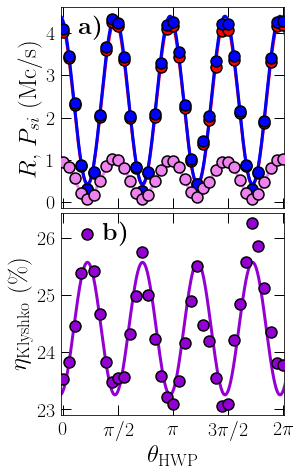

In [74]:
#Power Regulation HWP

##############################Initialise#####################################################
nrow = 2
ncol = 1
xsize = 4
ysize = 7.5


#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 6


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=25

#format axis labels
x_locator = FixedLocator([0,pi/2,pi,3*pi/2,2*pi])
x_formatter = FixedFormatter([0,r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')

for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].xaxis.set_major_locator(x_locator)
    axes[i].xaxis.set_major_formatter(x_formatter)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
    axes[i].set_xlim(-0.05,2*pi+0.05)
#axes[2].set_ylim(22.6,26.2)
    
axes[0].set_xticklabels([])
#axes[1].set_xticklabels([])

#cross correlation

#############################################################################################
#labels
axes[0].set_ylabel('$R$, $P_{si}$ (Mc/s)', fontsize = labelfont)
#axes[0].set_ylabel(r'Coincidence\\Rate (Mc/s)', fontsize = labelfont)
axes[1].set_ylabel(r'$\eta_{\text{Klyshko}}$ (\%)', fontsize = labelfont)
axes[1].set_xlabel(r'$\theta_{\text{HWP}}$', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

def cosf(x, a, b, c, d):
    return d*cos(a*array(x)+b)+c

def cf(xf, yf, a=4, b=0, c = 2, d = 2):
    p = p0=[a, b, c, d]
    
    popt, pcov = curve_fit(cosf, xf, yf, p0 = p)
    
    return popt



y_array = array(load('20200811_1514_powerdep_HWP_10deg_start0.npy'))
x_array = linspace(0, (len(y_array)-1)*10, len(y_array))*pi/180
x = linspace(-1, 10, 1000)

#Fits
axes[0].plot(x,cosf(x, *cf(x_array, y_array[:,0]/1e6)), color='red', lw =3)
axes[0].plot(x,cosf(x, *cf(x_array, y_array[:,1]/1e6)), color='blue', lw =3)
axes[0].plot(x,cosf(x, *cf(x_array, y_array[:,2]/1e6)), color='violet', lw =3)
axes[1].plot(x,cosf(x, *cf(x_array, y_array[:,3])), color='darkviolet', lw =3)

#Scatter
axes[0].plot(x_array,y_array[:,0]/1e6, '.', label='Signal',color  = 'red',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(x_array,y_array[:,1]/1e6, '.', label='Idler',color  = 'blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(x_array,y_array[:,2]/1e6, '.', label='Cross Correlation',color  = 'violet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1].plot(x_array,y_array[:,3], '.', label='Cross Correlation',color  = 'darkviolet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

lft = 0.13
btm = 0.9

axes[0].text(lft, btm,r'\textbf{a)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes, fontsize = labelfont)
axes[1].text(0.24, btm,r'\textbf{b)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1].transAxes, fontsize = labelfont)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]


Text(0.2, 0.9, '\\textbf{f)}')

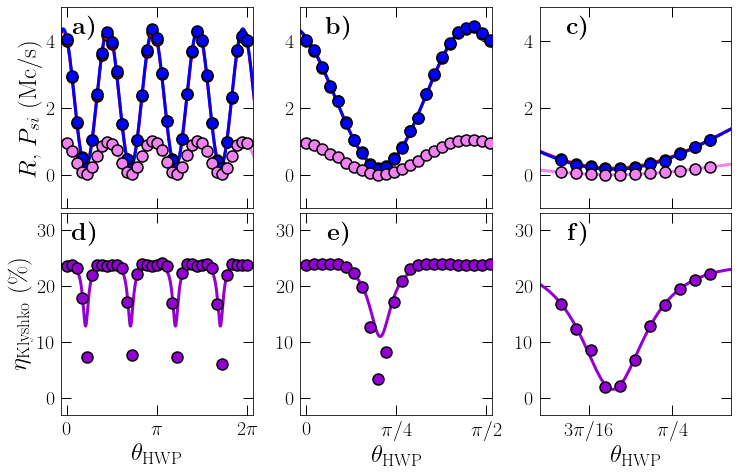

In [3]:
#HWP2

##############################Initialise#####################################################
nrow = 2
ncol = 3
xsize = 12
ysize = 7.5


#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 6


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=25

#format axis labels
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.25)

fig.set_facecolor('w')

for i in range(0,nrow):
    for j in range(0,ncol):
        axes[i,j].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
        axes[i,j].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
        axes[i,j].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
        axes[i,j].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    #     axes[i,j].yaxis.set_major_formatter(y_formatter)
    #     axes[i,j].yaxis.set_major_locator(y_locator)
        if j == 0:
            axes[i,j].set_xlim(-0.2,2*pi+0.2)
            axes[i,j].xaxis.set_major_locator(FixedLocator([0,pi,2*pi]))
            axes[i,j].xaxis.set_major_formatter(FixedFormatter([0,r'$\pi$',r'$2\pi$']))
        if j == 1:
            axes[i,j].set_xlim(-0.05,pi/2+0.05)
            axes[i,j].xaxis.set_major_locator(FixedLocator([0,pi/4,pi/2]))
            axes[i,j].xaxis.set_major_formatter(FixedFormatter([0,r'$\pi/4$',r'$\pi/2$']))
        if j == 2:
            axes[i,j].set_xlim(-0.05+30*pi/180,50*pi/180+0.05)
            axes[i,j].xaxis.set_major_locator(FixedLocator([0,3*pi/16,pi/4]))
            axes[i,j].xaxis.set_major_formatter(FixedFormatter([0,r'$3\pi/16$',r'$\pi/4$']))
        if i == 0:
            axes[i,j].set_xticklabels([])
            axes[i,j].set_ylim([-1, 5])
        if i == 1:
            axes[i,j].set_ylim([-3, 33])
        
#axes[2].set_ylim(22.6,26.2)


#cross correlation

#############################################################################################
#labels
axes[0,0].set_ylabel(r'$R$, $P_{si}$ (Mc/s)', fontsize = labelfont)
#axes[0].set_ylabel(r'Coincidence\\Rate (Mc/s)', fontsize = labelfont)
axes[1,0].set_ylabel(r'$\eta_{\text{Klyshko}}$ (\%)', fontsize = labelfont)
axes[1,0].set_xlabel(r'$\theta_{\text{HWP}}$', fontsize = labelfont)
axes[1,1].set_xlabel(r'$\theta_{\text{HWP}}$', fontsize = labelfont)
axes[1,2].set_xlabel(r'$\theta_{\text{HWP}}$', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

def cosf(x, a, b, c, d):
    return d*cos(a*array(x)+b)+c

def cf(xf, yf, a=4, b=0, c = 2, d = 2):
    p = p0=[a, b, c, d]
    
    popt, pcov = curve_fit(cosf, xf, yf, p0 = p)
    
    return popt

##############################################################################col 0
y_array = array(load('20200811_1534_powerdep_HWP2_10deg_start0.npy'))
x_array = linspace(0, (len(y_array)-1)*10, len(y_array))*pi/180
x = linspace(-1, 10, 1000)

#Fits
axes[0,0].plot(x,cosf(x, *cf(x_array, y_array[:,0]/1e6)), color='red', lw =3)
axes[0,0].plot(x,cosf(x, *cf(x_array, y_array[:,1]/1e6)), color='blue', lw =3)
axes[0,0].plot(x,cosf(x, *cf(x_array, y_array[:,2]/1e6)), color='violet', lw =3)
axes[1,0].plot(x,100*(cosf(x, *cf(x_array, y_array[:,2]/1e6)))/np.sqrt((cosf(x, *cf(x_array, y_array[:,0]/1e6)))*(cosf(x, *cf(x_array, y_array[:,1]/1e6)))), color='darkviolet', lw =3)

#Scatter
axes[0,0].plot(x_array,y_array[:,0]/1e6, '.', label='Signal',color  = 'red',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,0].plot(x_array,y_array[:,1]/1e6, '.', label='Idler',color  = 'blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,0].plot(x_array,y_array[:,2]/1e6, '.', label='Cross Correlation',color  = 'violet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1,0].plot(x_array,y_array[:,3], '.', label='Cross Correlation',color  = 'darkviolet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

lft = 0.12
btm = 0.9

axes[0,0].text(lft, btm,r'\textbf{a)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0,0].transAxes, fontsize = labelfont)
axes[1,0].text(lft, btm,r'\textbf{d)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1,0].transAxes, fontsize = labelfont)

##############################################################################col 1
y_array = array(load('20200811_1542_powerdep_HWP2_4deg_start0.npy'))
x_array = linspace(0, (len(y_array)-1)*4, len(y_array))*pi/180
x = linspace(-1, 10, 1000)

#Fits
axes[0,1].plot(x,cosf(x, *cf(x_array, y_array[:,0]/1e6)), color='red', lw =3)
axes[0,1].plot(x,cosf(x, *cf(x_array, y_array[:,1]/1e6)), color='blue', lw =3)
axes[0,1].plot(x,cosf(x, *cf(x_array, y_array[:,2]/1e6)), color='violet', lw =3)
axes[1,1].plot(x,100*(cosf(x, *cf(x_array, y_array[:,2]/1e6)))/np.sqrt((cosf(x, *cf(x_array, y_array[:,0]/1e6)))*(cosf(x, *cf(x_array, y_array[:,1]/1e6)))), color='darkviolet', lw =3)

#Scatter
axes[0,1].plot(x_array,y_array[:,0]/1e6, '.', label='Signal',color  = 'red',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,1].plot(x_array,y_array[:,1]/1e6, '.', label='Idler',color  = 'blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,1].plot(x_array,y_array[:,2]/1e6, '.', label='Cross Correlation',color  = 'violet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1,1].plot(x_array,y_array[:,3], '.', label='Cross Correlation',color  = 'darkviolet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

lft = 0.2
btm = 0.9

axes[0,1].text(lft, btm,r'\textbf{b)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0,1].transAxes, fontsize = labelfont)
axes[1,1].text(lft, btm,r'\textbf{e)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1,1].transAxes, fontsize = labelfont)

##############################################################################col 2
y_array = array(load('20200811_1548_powerdep_HWP2_2deg_start30.npy'))
x_array = linspace(30, (len(y_array)-1)*2+30, len(y_array))*pi/180
x = linspace(-1, 10, 1000)

#Fits
axes[0,2].plot(x,cosf(x, *cf(x_array, y_array[:,0]/1e6)), color='red', lw =3)
axes[0,2].plot(x,cosf(x, *cf(x_array, y_array[:,1]/1e6)), color='blue', lw =3)
axes[0,2].plot(x,cosf(x, *cf(x_array, y_array[:,2]/1e6)), color='violet', lw =3)
axes[1,2].plot(x,100*(cosf(x, *cf(x_array, y_array[:,2]/1e6)))/np.sqrt((cosf(x, *cf(x_array, y_array[:,0]/1e6)))*(cosf(x, *cf(x_array, y_array[:,1]/1e6)))), color='darkviolet', lw =3)

#Scatter
axes[0,2].plot(x_array,y_array[:,0]/1e6, '.', label='Signal',color  = 'red',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,2].plot(x_array,y_array[:,1]/1e6, '.', label='Idler',color  = 'blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,2].plot(x_array,y_array[:,2]/1e6, '.', label='Cross Correlation',color  = 'violet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1,2].plot(x_array,y_array[:,3], '.', label='Cross Correlation',color  = 'darkviolet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

axes[0,2].text(lft, btm,r'\textbf{c)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0,2].transAxes, fontsize = labelfont)
axes[1,2].text(lft, btm,r'\textbf{f)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1,2].transAxes, fontsize = labelfont)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]


Text(0.2, 0.2, '\\textbf{c)}')

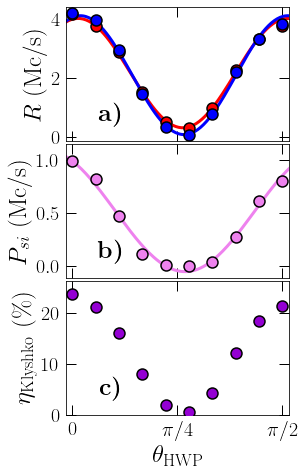

In [6]:
#HWP3

##############################Initialise#####################################################
nrow = 3
ncol = 1
xsize = 4
ysize = 7.5


#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 6


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=25

#format axis labels
x_locator = FixedLocator([0,pi/4,pi/2])
x_formatter = FixedFormatter([0,r'$\pi/4$',r'$\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')

for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].xaxis.set_major_locator(x_locator)
    axes[i].xaxis.set_major_formatter(x_formatter)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
    axes[i].set_xlim(-0.05,pi/2+0.05)
axes[2].set_ylim(0,26.2)
    
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

#############################################################################################
#labels
axes[0].set_ylabel(r'$R$ (Mc/s)', fontsize = labelfont)
axes[1].set_ylabel(r'$P_{si}$ (Mc/s)', fontsize = labelfont)
axes[2].set_ylabel(r'$\eta_{\text{Klyshko}}$ (\%)', fontsize = labelfont)
axes[2].set_xlabel(r'$\theta_{\text{HWP}}$', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

def cosf(x, a, b, c, d):
    return d*cos(a*array(x)+b)+c

def cf(xf, yf, a=4, b=0, c = 2, d = 2):
    p = p0=[a, b, c, d]
    
    
    popt, pcov = curve_fit(cosf, xf, yf, p0 = p)
    
    return popt



y_array = array(load('20200811_1610_powerdep_HWP3_10deg_start0.npy'))
x_array = linspace(0, (len(y_array)-1)*10+0, len(y_array))*pi/180
x = linspace(-1, 10, 1000)

#Fits
axes[0].plot(x,cosf(x, *cf(x_array, y_array[:,0]/1e6)), color='red', lw =3)
axes[0].plot(x,cosf(x, *cf(x_array, y_array[:,1]/1e6)), color='blue', lw =3)
axes[1].plot(x,cosf(x, *cf(x_array, y_array[:,2]/1e6)), color='violet', lw =3)
#axes[2].plot(x,100*(cosf(x, *cf(x_array, y_array[:,2]/1e6)))/np.sqrt((cosf(x, *cf(x_array, y_array[:,0]/1e6)))*(cosf(x, *cf(x_array, y_array[:,1]/1e6)))), color='darkviolet', lw =3)

#Scatter
axes[0].plot(x_array,y_array[:,0]/1e6, '.', label='Signal',color  = 'red',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0].plot(x_array,y_array[:,1]/1e6, '.', label='Idler',color  = 'blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1].plot(x_array,y_array[:,2]/1e6, '.', label='Cross Correlation',color  = 'violet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2].plot(x_array,y_array[:,3], '.', label='Cross Correlation',color  = 'darkviolet',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

axes[0].text(lft, 0.2,r'\textbf{a)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes, fontsize = labelfont)
axes[1].text(lft, 0.2,r'\textbf{b)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1].transAxes, fontsize = labelfont)
axes[2].text(lft, 0.2,r'\textbf{c)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[2].transAxes, fontsize = labelfont)



C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]


Text(0.2, 0.2, '\\textbf{c)}')

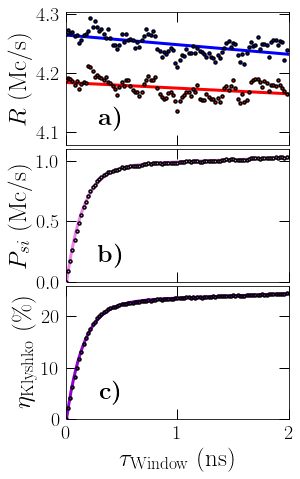

In [7]:
#Power Regulation

##############################Initialise#####################################################
nrow = 3
ncol = 1
xsize = 4
ysize = 7.5
msize = 6

#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 6


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=25

#format axis labels
#x_locator = FixedLocator([0,45,90])
#x_formatter = FixedFormatter([0,r'$\pi/4$',r'$\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')

for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#    axes[i].xaxis.set_major_formatter(x_formatter)
#    axes[i].xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
    axes[i].set_xlim(0,2)
#axes[0].set_ylim(-0.1,4.1)
axes[1].set_ylim(0,1.1)
axes[2].set_ylim(0,26)
    
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

#cross correlation

#############################################################################################
#labels
axes[0].set_ylabel('$R$ (Mc/s)', fontsize = labelfont)
axes[1].set_ylabel(r'$P_{si}$ (Mc/s)', fontsize = labelfont)
axes[2].set_ylabel(r'$\eta_{\text{Klyshko}}$ (\%)', fontsize = labelfont)
axes[2].set_xlabel(r'$\tau_{\text{Window}}$ (ns)', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

def linf(x, a, b):
    return a *array(x) + b

def cf(xf, yf, a=0, b=0):
    p = p0=[a, b]

    popt, pcov = curve_fit(linf, xf, yf, p0 = p)
    
    return popt

def expf(x, a, b,c,d):
    return a*exp(b*x)+ c + d*x

def expcf(xf, yf, a=-1, b=-2, c=1,d=0.1):
    p = p0=[a, b,c,d]

    popt, pcov = curve_fit(expf, xf, yf, p0 = p)
    
    return popt

y_array = array(load('20200811_1708_binwidth_iter_nbins100_binwidth20.npy'))
x_array = linspace(0, (len(y_array)-1)*20+0, len(y_array))/1000
x = linspace(-1, 10, 1000)

#Fits
axes[0].plot(x,linf(x, *cf(x_array, y_array[:,0]/1e6)), color='red', lw =3)
axes[0].plot(x,linf(x, *cf(x_array, y_array[:,1]/1e6)), color='blue', lw =3)
axes[1].plot(x,expf(x, *expcf(x_array, y_array[:,2]/1e6)), color='violet', lw =3)
axes[2].plot(x,expf(x, *expcf(x_array, y_array[:,3])), color='darkviolet', lw =3)

#Scatter
axes[0].plot(x_array,y_array[:,0]/1e6, '.', label='Signal',color  = 'red',markeredgewidth=1.5, markeredgecolor='k',markersize=msize,zorder=3)
axes[0].plot(x_array,y_array[:,1]/1e6, '.', label='Idler',color  = 'blue',markeredgewidth=1.5, markeredgecolor='k',markersize=msize,zorder=3)
axes[1].plot(x_array,y_array[:,2]/1e6, '.', label='Cross Correlation',color  = 'violet',markeredgewidth=1.5, markeredgecolor='k',markersize=msize,zorder=3)
axes[2].plot(x_array,y_array[:,3], '.', label='Cross Correlation',color  = 'darkviolet',markeredgewidth=1.5, markeredgecolor='k',markersize=msize,zorder=3)

axes[0].text(lft, 0.2,r'\textbf{a)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes, fontsize = labelfont)
axes[1].text(lft, 0.2,r'\textbf{b)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1].transAxes, fontsize = labelfont)
axes[2].text(lft, 0.2,r'\textbf{c)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[2].transAxes, fontsize = labelfont)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]


Text(0.3, 0.2, '\\textbf{c)}')

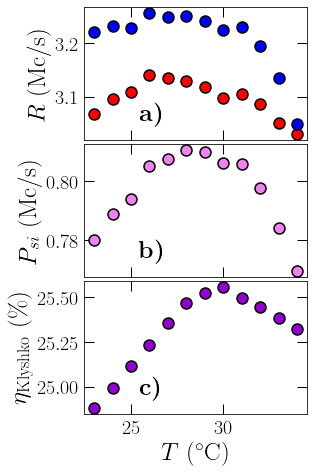

In [9]:
#Power Regulation

##############################Initialise#####################################################
nrow = 3
ncol = 1
xsize = 4
ysize = 7.5
msize = 22

#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 5


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=25

#format axis labels
#x_locator = FixedLocator([0,45,90])
#x_formatter = FixedFormatter([0,r'$\pi/4$',r'$\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')

for i in range(0,len(axes)):
    axes[i].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
    axes[i].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
    axes[i].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#    axes[i].xaxis.set_major_formatter(x_formatter)
#    axes[i].xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
 #   axes[i].set_xlim(0,2)
#axes[0].set_ylim(-0.1,4.1)
#axes[1].set_ylim(0,1.1)
#axes[2].set_ylim(0,26)
    
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

#cross correlation

#############################################################################################
#labels
axes[0].set_ylabel('$R$ (Mc/s)', fontsize = labelfont)
axes[1].set_ylabel(r'$P_{si}$ (Mc/s)', fontsize = labelfont)
axes[2].set_ylabel(r'$\eta_{\text{Klyshko}}$ (\%)', fontsize = labelfont)
axes[2].set_xlabel(r'$T$ ($^\circ$C)', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

def linf(x, a, b):
    return a *array(x) + b

def cf(xf, yf, a=0, b=0):
    p = p0=[a, b]

    popt, pcov = curve_fit(linf, xf, yf, p0 = p)
    
    return popt

def expf(x, a, b,c,d):
    return a*exp(b*x)+ c + d*x

def expcf(xf, yf, a=-1, b=-2, c=1,d=0.1):
    p = p0=[a, b,c,d]

    popt, pcov = curve_fit(expf, xf, yf, p0 = p)
    
    return popt

y_array = array(load('20200812_1423_temp_23_iter_1_noadjust.npy'))
x_array = linspace(23, (len(y_array)-1)*1+23, len(y_array))
x = linspace(-1, 10, 1000)

#Fits
#axes[0].plot(x,linf(x, *cf(x_array, y_array[:,0]/1e6)), color='red', lw =3)
#axes[0].plot(x,linf(x, *cf(x_array, y_array[:,1]/1e6)), color='blue', lw =3)
#axes[1].plot(x,expf(x, *expcf(x_array, y_array[:,2]/1e6)), color='violet', lw =3)
#axes[2].plot(x,expf(x, *expcf(x_array, y_array[:,3])), color='darkviolet', lw =3)

#Scatter
axes[0].plot(x_array,y_array[:,0]/1e6, '.', label='Signal',color  = 'red',markeredgewidth=1.5, markeredgecolor='k',markersize=msize,zorder=3)
axes[0].plot(x_array,y_array[:,1]/1e6, '.', label='Idler',color  = 'blue',markeredgewidth=1.5, markeredgecolor='k',markersize=msize,zorder=3)
axes[1].plot(x_array,y_array[:,2]/1e6, '.', label='Cross Correlation',color  = 'violet',markeredgewidth=1.5, markeredgecolor='k',markersize=msize,zorder=3)
axes[2].plot(x_array,y_array[:,3], '.', label='Cross Correlation',color  = 'darkviolet',markeredgewidth=1.5, markeredgecolor='k',markersize=msize,zorder=3)

axes[0].text(0.3, 0.2,r'\textbf{a)}',color = 'black', horizontalalignment='center', verticalalignment='center', transform = axes[0].transAxes, fontsize = labelfont)
axes[1].text(0.3, 0.2,r'\textbf{b)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[1].transAxes, fontsize = labelfont)
axes[2].text(0.3, 0.2,r'\textbf{c)}',color = 'black',horizontalalignment='center', verticalalignment='center' , transform = axes[2].transAxes, fontsize = labelfont)



In [94]:
from scipy.optimize import curve_fit

def appg2herald(t, a, b, c):
    return a - exp(-2*(b*c/(b+c)*t)**2)

def optherald(xdata, ydata, p0):
    popt, pcov = curve_fit(appg2herald, xdata, ydata, p0)
    return [popt,pcov]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]


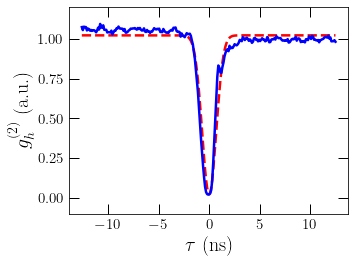

In [162]:
#g2h

##############################Initialise#####################################################
nrow = 1
ncol = 1
xsize = 5
ysize = 3.8
msize = 22

#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 2.5 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 5


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 15 #axis label font size
numsize = 15 #axis number font size
legfont = 15 #legend font size
labelfont=20

#format axis labels
#x_locator = FixedLocator([0,45,90])
#x_formatter = FixedFormatter([0,r'$\pi/4$',r'$\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')

#for i in range(0,len(axes)):
axes.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
axes.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#    axes[i].xaxis.set_major_formatter(x_formatter)
#    axes[i].xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
 #   axes[i].set_xlim(0,2)
axes.set_ylim([-0.1, 1.2])
#axes[1].set_ylim(0,1.1)
#axes[2].set_ylim(0,26)
    

#cross correlation

#############################################################################################
#labels
axes.set_ylabel(r'$g^{(2)}_h$ (a.u.)', fontsize = labelfont)
axes.set_xlabel(r'$\tau$ (ns)', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

g2 = np.load('20200812_1158_g2_heralded_100_binwidth_250_nbins.npy')
t = linspace(-12580, 12480, 250)*1e-12

gopt, gcov = optherald(t, g2, p0=[1, 2e9, 1e9])

axes.plot(t*1e9, appg2herald(t, gopt[0], gopt[1], gopt[2]), '--', lw = linew, color = 'red', label = 'Gaussian Fit')
axes.plot(t*1e9, g2, color= 'blue', lw = linew, label = r'$g^{(2)}_{\text{heralded}}$')


In [ ]:
#g2h

##############################Initialise#####################################################
nrow = 1
ncol = 1
xsize = 5
ysize = 3.8
msize = 22

#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 2.5 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 5


#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 15 #axis label font size
numsize = 15 #axis number font size
legfont = 15 #legend font size
labelfont=20

#format axis labels
#x_locator = FixedLocator([0,45,90])
#x_formatter = FixedFormatter([0,r'$\pi/4$',r'$\pi/2$'])
#y_locator = FixedLocator([0,.5,1.00])
#y_formatter = FixedFormatter([0,.5,1.00])

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))

fig.subplots_adjust(hspace=0.025, wspace=0.025)

fig.set_facecolor('w')

#for i in range(0,len(axes)):
axes.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
axes.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#    axes[i].xaxis.set_major_formatter(x_formatter)
#    axes[i].xaxis.set_major_locator(x_locator)
#     axes[i,j].yaxis.set_major_formatter(y_formatter)
#     axes[i,j].yaxis.set_major_locator(y_locator)
 #   axes[i].set_xlim(0,2)
axes.set_ylim([-0.1, 1.2])
#axes[1].set_ylim(0,1.1)
#axes[2].set_ylim(0,26)
    

#cross correlation

#############################################################################################
#labels
axes.set_ylabel(r'$g^{(2)}_h$ (a.u.)', fontsize = labelfont)
axes.set_xlabel(r'$\tau$ (ns)', fontsize = labelfont)
#axes.legend(ncol = 2, fontsize = legfont)
#############################################################################################

g2 = np.load('20200812_1158_g2_heralded_100_binwidth_250_nbins.npy')
t = linspace(-12580, 12480, 250)*1e-12

gopt, gcov = optherald(t, g2, p0=[1, 2e9, 1e9])

axes.plot(t*1e9, appg2herald(t, gopt[0], gopt[1], gopt[2]), '--', lw = linew, color = 'red', label = 'Gaussian Fit')
axes.plot(t*1e9, g2, color= 'blue', lw = linew, label = r'$g^{(2)}_{\text{heralded}}$')


In [163]:
min(g2)

0.019696812518534706